### Item 5

Pesquise e implemente um filtro para remoção de ruídos que não possa ser representado com convoluções.

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
def compute_mask(rows, cols, threshold):
    center_row, center_col = rows // 2, cols // 2
    x = np.linspace(-center_row, center_row, cols)
    y = np.linspace(-center_col, center_col, rows)
    X, Y = np.meshgrid(x, y)
    mask = np.exp(-(X**2 + Y**2) / (2 * threshold**2))
    return mask

def denoise_channel(channel, mask):
    fft = np.fft.fft2(channel)

    masked_shifted = mask * np.fft.fftshift(fft)

    inverse_shifted = np.fft.ifftshift(masked_shifted)

    result = np.uint8(np.abs(np.fft.ifft2(inverse_shifted)))

    return result

def denoise(image, threshold):
    rows, cols = image.shape[:2]

    mask = compute_mask(rows, cols, threshold)

    result = cv2.merge([denoise_channel(channel, mask) for channel in cv2.split(image)])

    return result


In [3]:
def plot_compare(*args):
    L = len(args)

    if (L == 0):
        return None
    elif (L == 1):
        f = plt.figure(figsize=(15,15))
        plt.imshow(args[0])
        plt.axis('off')
    else:
        f, axs = plt.subplots(1, L, figsize=(15,15*L))
        for i, ax in enumerate(axs):
            ax.imshow(args[i])
            ax.axis('off')
    plt.show()
    return f 


### Resultados

O método de denoise através de FFT transforma a imagem em uma representação no domínio da frequência, que através do shift e a aplicação de threshold, elimina do sinal as frequências mais altas (ruído). Por se tratar de uma transformação do sinal baseada em frequência, não pode ser representado por abordagem convolucional.

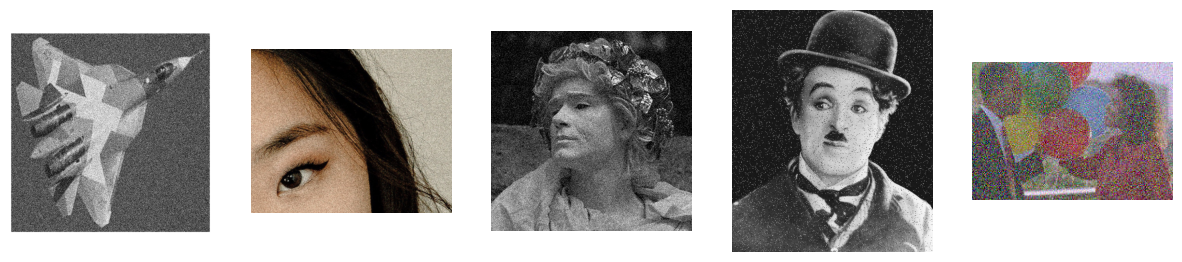

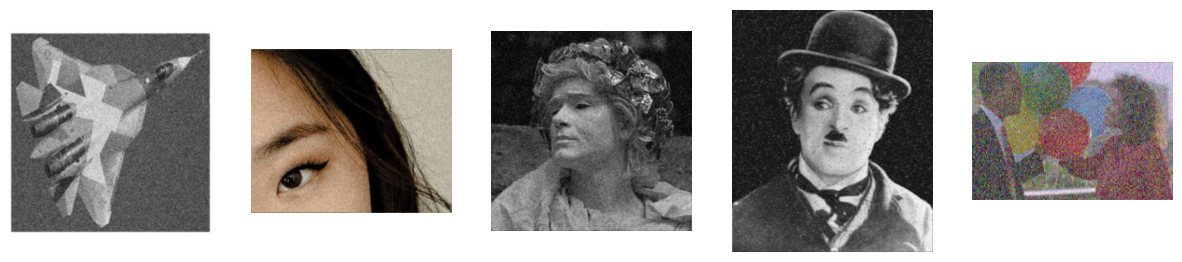

In [4]:
images = [cv2.cvtColor(cv2.imread(f'./images/{i}'), cv2.COLOR_BGR2RGB) for i in ["jet.png", "face.jpg", "statue.jpg", "chaplin.png", "baloon.jpeg"]]

original = plot_compare(*images)
original.savefig("./results/original.jpg", dpi=300, bbox_inches='tight', pad_inches=0.1)

denoised = [denoise(image, 70) for image in images]
result = plot_compare(*denoised)
result.savefig("./results/denoised.jpg", dpi=300, bbox_inches='tight', pad_inches=0.1)
